<a href="https://colab.research.google.com/github/Ch0ro/ML-DL/blob/master/%EB%8B%A4%EC%A4%91_%EB%A6%BF%EC%A7%80_%EB%9D%BC%EC%8F%98_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 특성 공학(Feature Engineering)


*   기존의 특성을 사용해 새로운 특성을 뽑아내는 작업
*   ex) [길이, 높이] -> [길이, 길이^2, 길이*높이,높이^2,높이]



### 데이터 준비

In [4]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [5]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### 훈련 세트/테스트 세트 분리

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target,test_target = train_test_split(perch_full,perch_weight,random_state=42)

# PolynomialFeatures

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# 예시
poly = PolynomialFeatures()
poly.fit([[2,3]])
poly.transform([[2,3]]) # 2개의 특성 [2,3]이 6개의 특성을 가진 [1,2,3,4,6,9] 샘플로 바뀜
# 2,3,4,6,9 는 2와 3을 조합해서 나온 수
# 그러나 1은 선형 방정식의 절편때문에 생겨난 것이고, 이는 원래 특성이 [2,3]이 아닌 [1,2,3]이라는 의미가 되므로 이를 삭제 하고 진행

array([[1., 2., 3., 4., 6., 9.]])

In [9]:
poly = PolynomialFeatures(include_bias=False) # 절편 추가 안함
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

**실제 데이터에 적용**

In [10]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape # 특성이 9개로 늘어남

(42, 9)

In [11]:
poly.get_feature_names() # 특성이 어떻게 만들어졌는지 확인

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [12]:
test_poly = poly.transform(test_input) # test_input도 특성 조정

# 다중 회귀 모델 

In [13]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_poly,train_target)
lr.score(train_poly,train_target)

0.9903183436982124

In [14]:
lr.score(test_poly,test_target)

0.9714559911594132

### 3제곱, 4제곱 등 고차원 특성을 넣어보면?

In [15]:
poly=PolynomialFeatures(degree=5,include_bias=False) # 5제곱까지 특성을 만듦
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape # 특성이 55개 까지 늘어남

(42, 55)

In [19]:
lr.fit(train_poly,train_target)
lr.score(train_poly,train_target)

0.9999999999991096

In [20]:
lr.score(test_poly,test_target)

-144.40579242335605



*   테스트 세트에 대한 값은 음수가 나오고 있음 => 과대적합 (특성의 개수가 많다고 무조건 좋은 것이 아님)
*   각 변수의 회귀 계수(기울기 또는 가중치)의 크기를 작게 만들어 선형적으로 만들어야 함
*   이 때 특성별로 회귀 계수의 크기가 상이하므로 정규화 작업을 통해 스케일을 맞춰줘야 함




# 규제


*   머신러닝 모델이 훈련 세트를 과도하게 학습하지 못하도록 훼방하는 것 즉, 과대적합 방지
*   선형 모델은 기울기를 작게 만들어 규제함 
*   스케일링 및 정규화 작업 진행






In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지와 라쏘 회귀


*   선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘라고 부름
*   릿지: 계수를 제곱한 값을 기준으로 규제
*   라쏘: 계수의 절댓값을 기준으로 규제
*   일반적으로 릿지를 더 선호하고, 라쏘는 계수의 크기를 0으로도 만들 수 있음





## ► 릿지 회귀

In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled,train_target)

0.9896101671037343

In [24]:
ridge.score(test_scaled,test_target)

0.9790693977615398



*   alpha: 릿지와 라쏘 모델에서 규제의 양을 임의로 조정하는 하이퍼파라미터로, alpha 값이 커질수록 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도함
>
*   적절한 alpha 값을 찾기위해 각 값에 대한 R^2 값 그래프를 그려보자




In [25]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge=Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수 저장
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

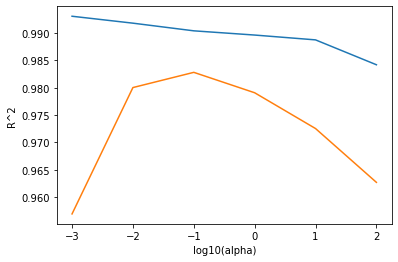

In [26]:
# alpha 값들이 굉장히 작기 때문에 log값을 취해서 그래프 그리겠음
plt.plot(np.log10(alpha_list),train_score) # 기본값 파란색 선
plt.plot(np.log10(alpha_list),test_score) # 주황색 선
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.show()



*   그래프 왼쪽: 훈련 점수와 테스트 점수의 차이가 큰 것을 알 수 있음 => 과대적합으로 보임
*   그래프 오른쪽: 훈련 점수와 테스트 점수 모두 낮아지고 있음 => 과소 적합 
>
*   적절한 alpha값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높음 -1 즉 0.1





### alpha = 0.1 인 최종 모델 생성

In [27]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570366
0.9827976465386927


## ► 라쏘 회귀

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled,test_target))

0.9897898972080961
0.9800593698421883




*   훈련 점수와 테스트 점수 모두 과소/과대 적합 없이 잘나옴
*   라쏘도 alpha를 조정할 수 있으므로 한번 확인해보겠음



In [30]:
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
  # 라쏘 모델 생성
  lasso = Lasso(alpha=alpha, max_iter=10000) # 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 이런 횟수를 지정하는 것이 max_iter 이다.
  # 반복 횟수가 부족하지 않도록 충분이 10000으로 설정
  # 라쏘 모델 훈련
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


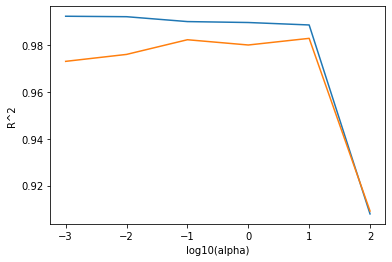

In [31]:
# alpha 값들이 굉장히 작기 때문에 log값을 취해서 그래프 그리겠음
plt.plot(np.log10(alpha_list),train_score) # 기본값 파란색 선
plt.plot(np.log10(alpha_list),test_score) # 주황색 선
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.show()



*   그래프 왼쪽: 훈련 점수가 월등히 높아 과대적합을 보여주고 있음
*   그래프 오른쪽으로 갈수록 두 점수의 차이가 좁혀지고 있으나, 과소적합 문제를 보임

>
*   최적의 alpha는 1 즉 10 (로그 값이 1이므로 alpha는 10)





### alpha = 10인 최종 모델 생성

In [32]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9888067471131867
0.9824470598706695


In [33]:
np.sum(lasso.coef_==0) # 55개의 특성 중 40개의 계수가 0이 됐음 즉, 유용한 특성은 15개

40



*   lasso.coef_==0에서 True(=1)인 값들의 합을 구한 것이므로 40이 곧 개수가 됨
*   15개의 유용한 특성을 확인 => 특성을 골라내는 용도로도 사용 가능

